## 1. Load the packages and the dataset

In [ ]:
# load the package
library(ggplot2)
library(corrplot)
library(caret)
library(C50)
library(e1071)
library(nnet)
library(randomForest)
library(plyr)

In [ ]:
# read data
wine<-read.csv("Q2_winequality-2.csv",header=T)

## 2. Exploratory data analysis

### 2.1 Check the basic information of the dataset

In [617]:
# check first 3 rows
head(wine,3)
# check the structure
str(wine)
# check the descriptive statistics
summary(wine)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,winetype,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,red,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,red,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,red,5


'data.frame':	6497 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : int  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: int  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ winetype            : Factor w/ 2 levels "red","white": 1 1 1 1 1 1 1 1 1 1 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


 fixed.acidity   volatile.acidity  citric.acid    residual.sugar 
 Min.   : 3.80   Min.   :0.08     Min.   :0.000   Min.   : 0.60  
 1st Qu.: 6.40   1st Qu.:0.23     1st Qu.:0.250   1st Qu.: 1.80  
 Median : 7.00   Median :0.29     Median :0.310   Median : 3.00  
 Mean   : 7.21   Mean   :0.34     Mean   :0.319   Mean   : 5.44  
 3rd Qu.: 7.70   3rd Qu.:0.40     3rd Qu.:0.390   3rd Qu.: 8.10  
 Max.   :15.90   Max.   :1.58     Max.   :1.660   Max.   :65.80  
   chlorides     free.sulfur.dioxide total.sulfur.dioxide    density     
 Min.   :0.009   Min.   :  1.0       Min.   :  6          Min.   :0.987  
 1st Qu.:0.038   1st Qu.: 17.0       1st Qu.: 77          1st Qu.:0.992  
 Median :0.047   Median : 29.0       Median :118          Median :0.995  
 Mean   :0.056   Mean   : 30.5       Mean   :116          Mean   :0.995  
 3rd Qu.:0.065   3rd Qu.: 41.0       3rd Qu.:156          3rd Qu.:0.997  
 Max.   :0.611   Max.   :289.0       Max.   :440          Max.   :1.039  
       pH         su

### Explanations:

* Based on the basic information of this dataset, there are 6497 rows and 13 columns, 12 numeric variables and 1 categorical 
variable, winetype, but from the background of the dataset, it is about prediction of wine quality, so the wine quality should 
be factor, this will be changes in the further steps.


### 2.2 Check duplicated rows and missing values

In [618]:
# check duplicated rows
sum(duplicated(wine))
# check misisng values
sum(is.na(wine))

[1] 1177

[1] 0

### Explanations:

* There are 1177 duplicated rows, which will be removed.

* There is no missing values in this dataset.

In [619]:
# remove duplicated rows
wine1<-wine[!duplicated(wine),]
# check the structure
str(wine1)

'data.frame':	5320 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.9 7.3 7.8 7.5 6.7 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.66 0.6 0.65 0.58 0.5 0.58 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0.06 0 0.02 0.36 0.08 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.8 1.6 1.2 2 6.1 1.8 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.075 0.069 0.065 0.073 0.071 0.097 ...
 $ free.sulfur.dioxide : int  11 25 15 17 13 15 15 9 17 15 ...
 $ total.sulfur.dioxide: int  34 67 54 60 40 59 21 18 102 65 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.3 3.39 3.36 3.35 3.28 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.46 0.47 0.57 0.8 0.54 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 10 9.5 10.5 9.2 ...
 $ winetype            : Factor w/ 2 levels "red","white": 1 1 1 1 1 1 1 1 1 1 ...
 $ quality             : int  5 5 5 6 5 5 7 7 5 5 

In [620]:
table(wine1$quality)


   3    4    5    6    7    8    9 
  30  206 1752 2323  856  148    5 

### Explanations:

* After removing the duplicated rows, there are 5320 rows left, 13 columns in the dataset.

* For the target wine quality, there are 30 values of level 3, 206 of level 4, 1752 of level 5, 2323 of level 6, 
856 of level 7, 148 of level 8 and 5 of level 9. 

### 2.3 Recode the categorical variables

In [621]:
# change quality to factor and recoding

wine2<-wine1 # copy the dataset

# recoding it, if the quality<5, make it as 0, means Low quality, if quality>6, make it as 2, means High quality
# if it is 5 or 6, make it as 1, means medium quality
wine2$quality<-ifelse(wine1$quality<5, 0,ifelse(wine1$quality>6, 2, 1))

table(wine2$quality) # check the distribution


   0    1    2 
 236 4075 1009 

In [622]:
# recode the winetype to 0 and 1
wine2$winetype<-revalue(wine2$winetype,c("red"=0,"white"=1))

### Explanations:

* The reason that I choose recode the quality as 0, Low quality if the level is less than 5 is based on the consumer habit and experience, when we do survey, the the level is lower than 5, we think it is poor or low quality, when the score is 5 or 6, we think it belongs to medium quality, when the score is higher than 6, we think  it belongs to high quality.

* After recoding, there are 236 of 0, 4075 of 1 and 2 of 1009, which is highly inbalanced.

* But regarding this is the real characteristic of the dataset, or it is the real distribution, I will keep it like this.

In [623]:
# check structure
str(wine2)

'data.frame':	5320 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.9 7.3 7.8 7.5 6.7 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.66 0.6 0.65 0.58 0.5 0.58 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0.06 0 0.02 0.36 0.08 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.8 1.6 1.2 2 6.1 1.8 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.075 0.069 0.065 0.073 0.071 0.097 ...
 $ free.sulfur.dioxide : int  11 25 15 17 13 15 15 9 17 15 ...
 $ total.sulfur.dioxide: int  34 67 54 60 40 59 21 18 102 65 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.3 3.39 3.36 3.35 3.28 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.46 0.47 0.57 0.8 0.54 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 10 9.5 10.5 9.2 ...
 $ winetype            : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ quality             : num  1 1 1 1 1 1 2 2 1 1 ...


In [624]:
# change quality to factor and ckeck the structure
wine2$quality<-as.factor(wine2$quality)
str(wine2)

'data.frame':	5320 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.9 7.3 7.8 7.5 6.7 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.66 0.6 0.65 0.58 0.5 0.58 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0.06 0 0.02 0.36 0.08 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.8 1.6 1.2 2 6.1 1.8 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.075 0.069 0.065 0.073 0.071 0.097 ...
 $ free.sulfur.dioxide : int  11 25 15 17 13 15 15 9 17 15 ...
 $ total.sulfur.dioxide: int  34 67 54 60 40 59 21 18 102 65 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.3 3.39 3.36 3.35 3.28 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.46 0.47 0.57 0.8 0.54 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 10 9.5 10.5 9.2 ...
 $ winetype            : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ quality             : Factor w/ 3 levels "0","1","2":

### Explanations:

* After recoding and change the quality to factor, now the dataset has 2 factors, and the quality has 3 levels

* Since in this dataset, most of the variables are numeric ones, it is essential to check the collinearity among these variables 

### 2.4 Check the Collinearity

In [625]:
# check the colinearity
findCorrelation(cor(wine2[,1:11]),cutoff=0.6,verbose=T) # check correlations
findLinearCombos(cor(wine2[,1:11])) # check combined correlations

Compare row 7  and column  6 with corr  0.72 
  Means:  0.316 vs 0.24 so flagging column 7 
Compare row 8  and column  11 with corr  0.668 
  Means:  0.307 vs 0.229 so flagging column 8 
All correlations <= 0.6 


[1] 7 8

$linearCombos
list()

$remove
NULL

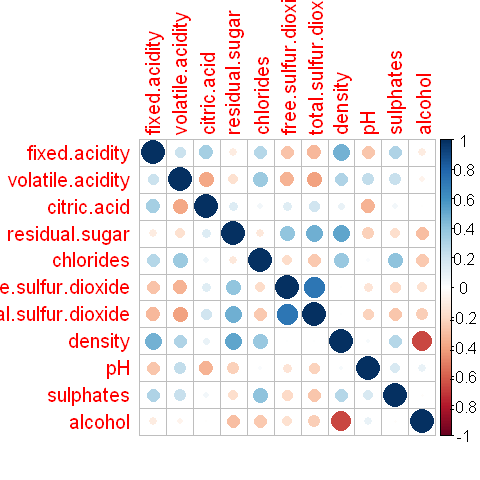

In [627]:
# set plot size to 4 x 4
options(repr.plot.width=4, repr.plot.height=4)
corrplot(cor(wine2[,1:11])) # check the correlation plot

### Explanations:

* From the correlations result, there are strong correlations between density and achohol, free.sulfur.dioxide and total.sulfur.dioxide, the total.sulfur.dioxide and density will be removed.

* The other correlations are less than 0.6, which will be kept.

In [628]:
# remove the density and total.sulfur.dioxide
wine3<-subset(wine2,select=-c(density,total.sulfur.dioxide)) 
str(wine3) # check the structure

'data.frame':	5320 obs. of  11 variables:
 $ fixed.acidity      : num  7.4 7.8 7.8 11.2 7.4 7.9 7.3 7.8 7.5 6.7 ...
 $ volatile.acidity   : num  0.7 0.88 0.76 0.28 0.66 0.6 0.65 0.58 0.5 0.58 ...
 $ citric.acid        : num  0 0 0.04 0.56 0 0.06 0 0.02 0.36 0.08 ...
 $ residual.sugar     : num  1.9 2.6 2.3 1.9 1.8 1.6 1.2 2 6.1 1.8 ...
 $ chlorides          : num  0.076 0.098 0.092 0.075 0.075 0.069 0.065 0.073 0.071 0.097 ...
 $ free.sulfur.dioxide: int  11 25 15 17 13 15 15 9 17 15 ...
 $ pH                 : num  3.51 3.2 3.26 3.16 3.51 3.3 3.39 3.36 3.35 3.28 ...
 $ sulphates          : num  0.56 0.68 0.65 0.58 0.56 0.46 0.47 0.57 0.8 0.54 ...
 $ alcohol            : num  9.4 9.8 9.8 9.8 9.4 9.4 10 9.5 10.5 9.2 ...
 $ winetype           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ quality            : Factor w/ 3 levels "0","1","2": 2 2 2 2 2 2 3 3 2 2 ...


### Explanations:

* After removing the two variables, the dataset has 5320 rows and 11 variables.

### 2.5 Check the skewness

In [629]:
sapply(wine3[,1:9],function(x) skewness(x))

fixed.acidity    volatile.acidity         citric.acid      residual.sugar 
             1.6495              1.5037              0.4840              1.7056 
          chlorides free.sulfur.dioxide                  pH           sulphates 
             5.3352              1.3606              0.3897              1.8084 
            alcohol 
             0.5454

In [630]:
summary(wine3)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar 
 Min.   : 3.80   Min.   :0.080    Min.   :0.000   Min.   : 0.60  
 1st Qu.: 6.40   1st Qu.:0.230    1st Qu.:0.240   1st Qu.: 1.80  
 Median : 7.00   Median :0.300    Median :0.310   Median : 2.70  
 Mean   : 7.21   Mean   :0.344    Mean   :0.318   Mean   : 5.05  
 3rd Qu.: 7.70   3rd Qu.:0.410    3rd Qu.:0.400   3rd Qu.: 7.50  
 Max.   :15.90   Max.   :1.580    Max.   :1.660   Max.   :65.80  
   chlorides      free.sulfur.dioxide       pH         sulphates    
 Min.   :0.0090   Min.   :  1         Min.   :2.72   Min.   :0.220  
 1st Qu.:0.0380   1st Qu.: 16         1st Qu.:3.11   1st Qu.:0.430  
 Median :0.0470   Median : 28         Median :3.21   Median :0.510  
 Mean   :0.0567   Mean   : 30         Mean   :3.23   Mean   :0.533  
 3rd Qu.:0.0660   3rd Qu.: 41         3rd Qu.:3.33   3rd Qu.:0.600  
 Max.   :0.6110   Max.   :289         Max.   :4.01   Max.   :2.000  
    alcohol     winetype quality 
 Min.   : 8.0   0:135

### Explanations:

* The skewness result shows some of the variables are highly skewed since the value are much bigger than 1,such as chlorides.

* The ranges of the numeric variables have big difference, some are between 0 and 1,like chlorides, some are between 0 and 65.8, such as residual.sugar.

### 2.6 Data visualization with univariate plots

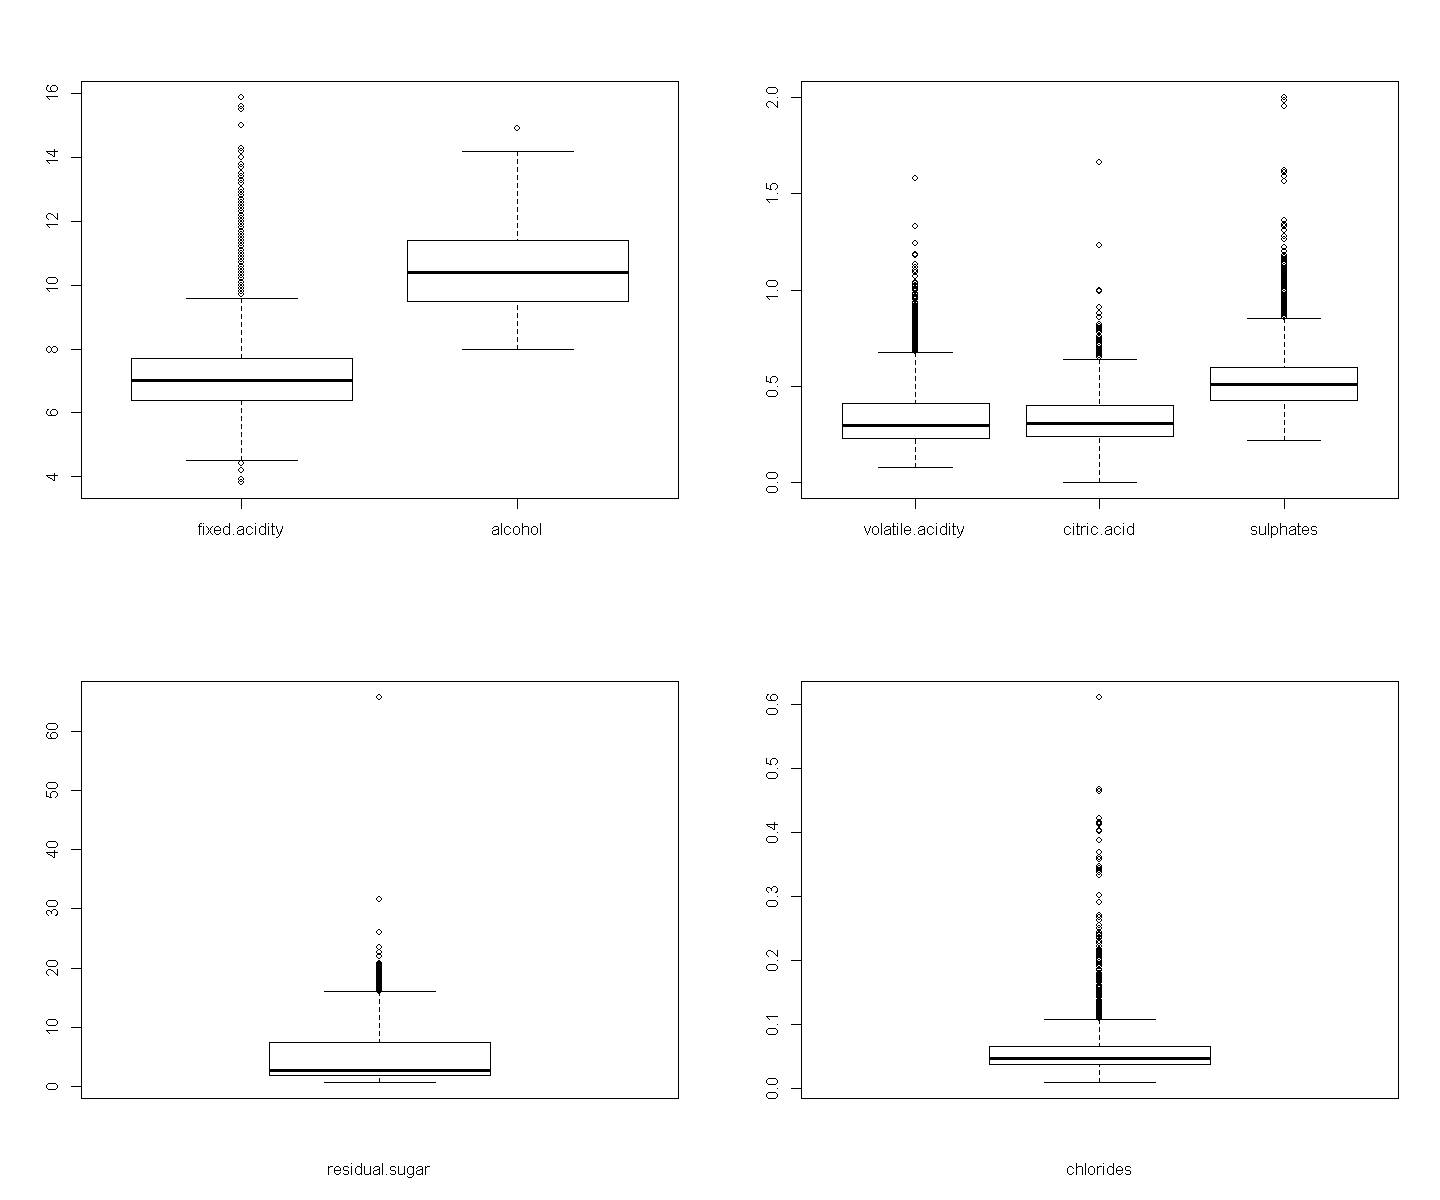

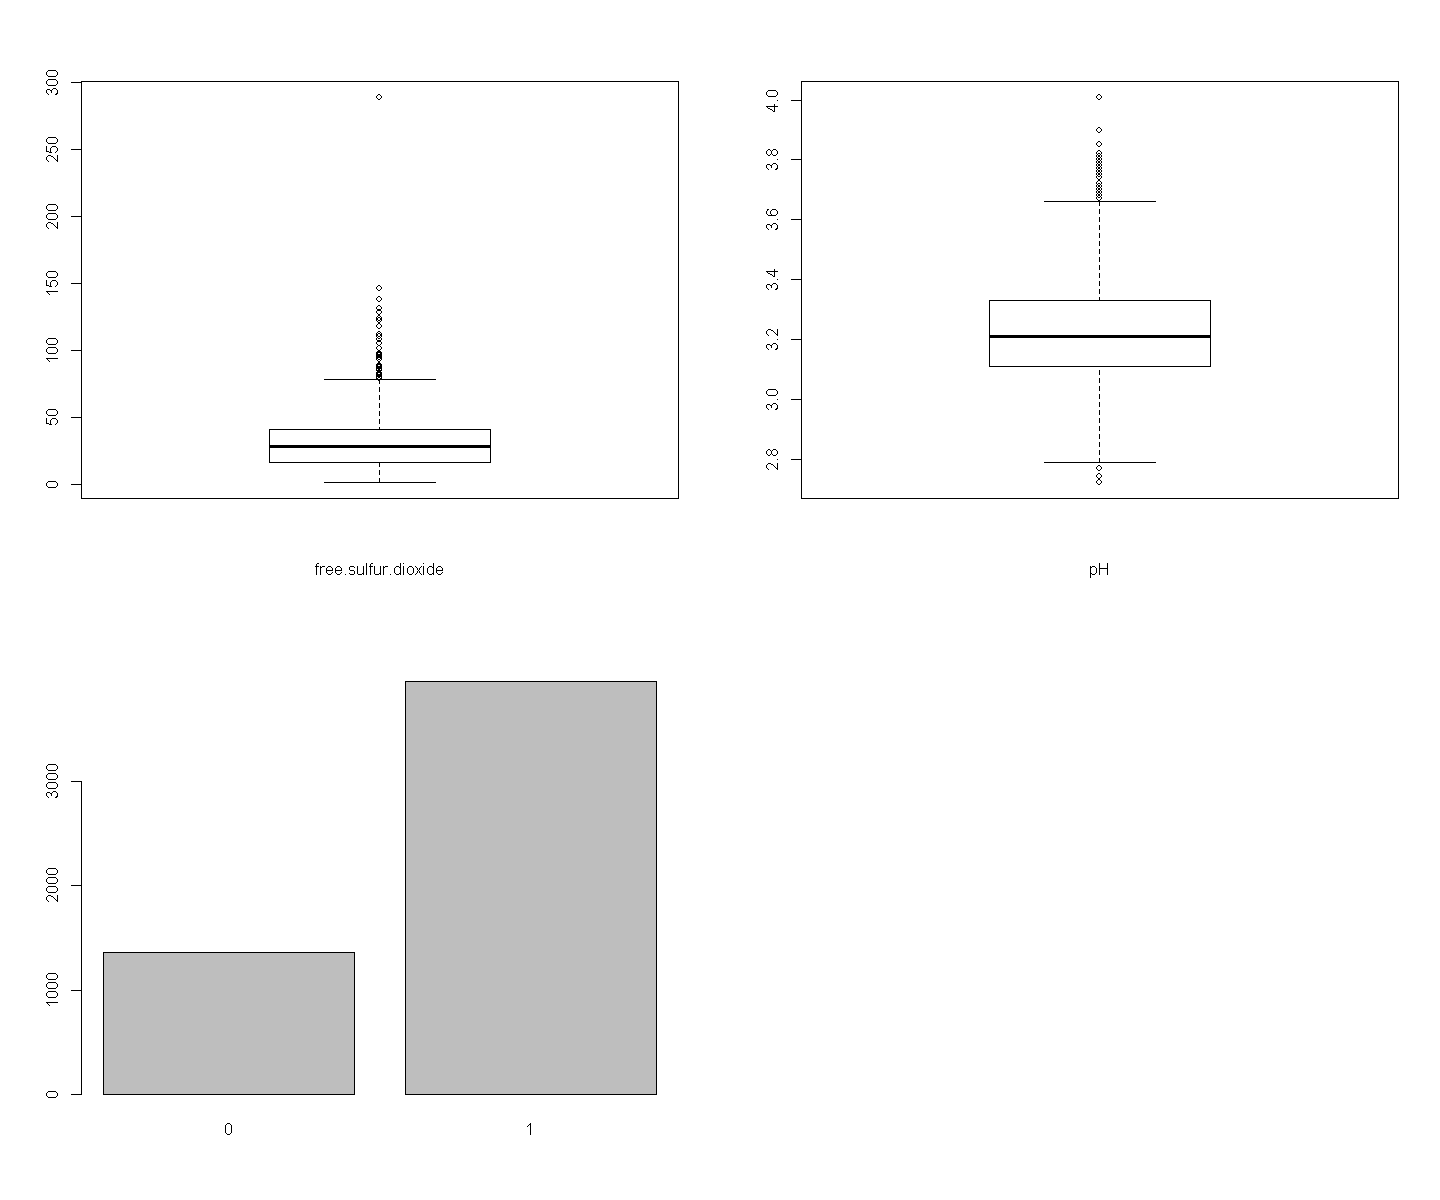

In [634]:
# check the distribution of numeric variables
# set plot size to 12 x 10
options(repr.plot.width=12, repr.plot.height=10)

par(mfrow=c(2,2)) # set the layout of the plots

# plot the "fixed.acidity","alcohol" on a boxplot because their ranges are close
boxplot(wine3[,c("fixed.acidity","alcohol")]) 

# plot the "volatile.acidity","citric.acid","sulphates"on a boxplot because their ranges are close
boxplot(wine3[,c("volatile.acidity","citric.acid","sulphates")])

# plot the "residual.sugar"
boxplot(wine3[,c("residual.sugar")],xlab="residual.sugar")

# plot the "chlorides"
boxplot(wine3[,c("chlorides")],xlab="chlorides")

# plot the "free.sulfur.dioxide"
boxplot(wine3[,"free.sulfur.dioxide"],xlab="free.sulfur.dioxide")

# plot the "pH"
boxplot(wine3[,c("pH")],xlab="pH")

# plot the "winetype"
plot(wine3[,c("winetype")])

### Explanations:

* The variables are in different ranges, the ones with similar range are plotted in the same boxplot in order to avoid too many plots and this will be easier to visualize;
* From the plot, achohol only has one outlier, whereas all the other variables have many outliers.
* In the bar plot, white wine has more sample than white wine in this dataset. 

### 2.7 Data visualization with bivariate plots

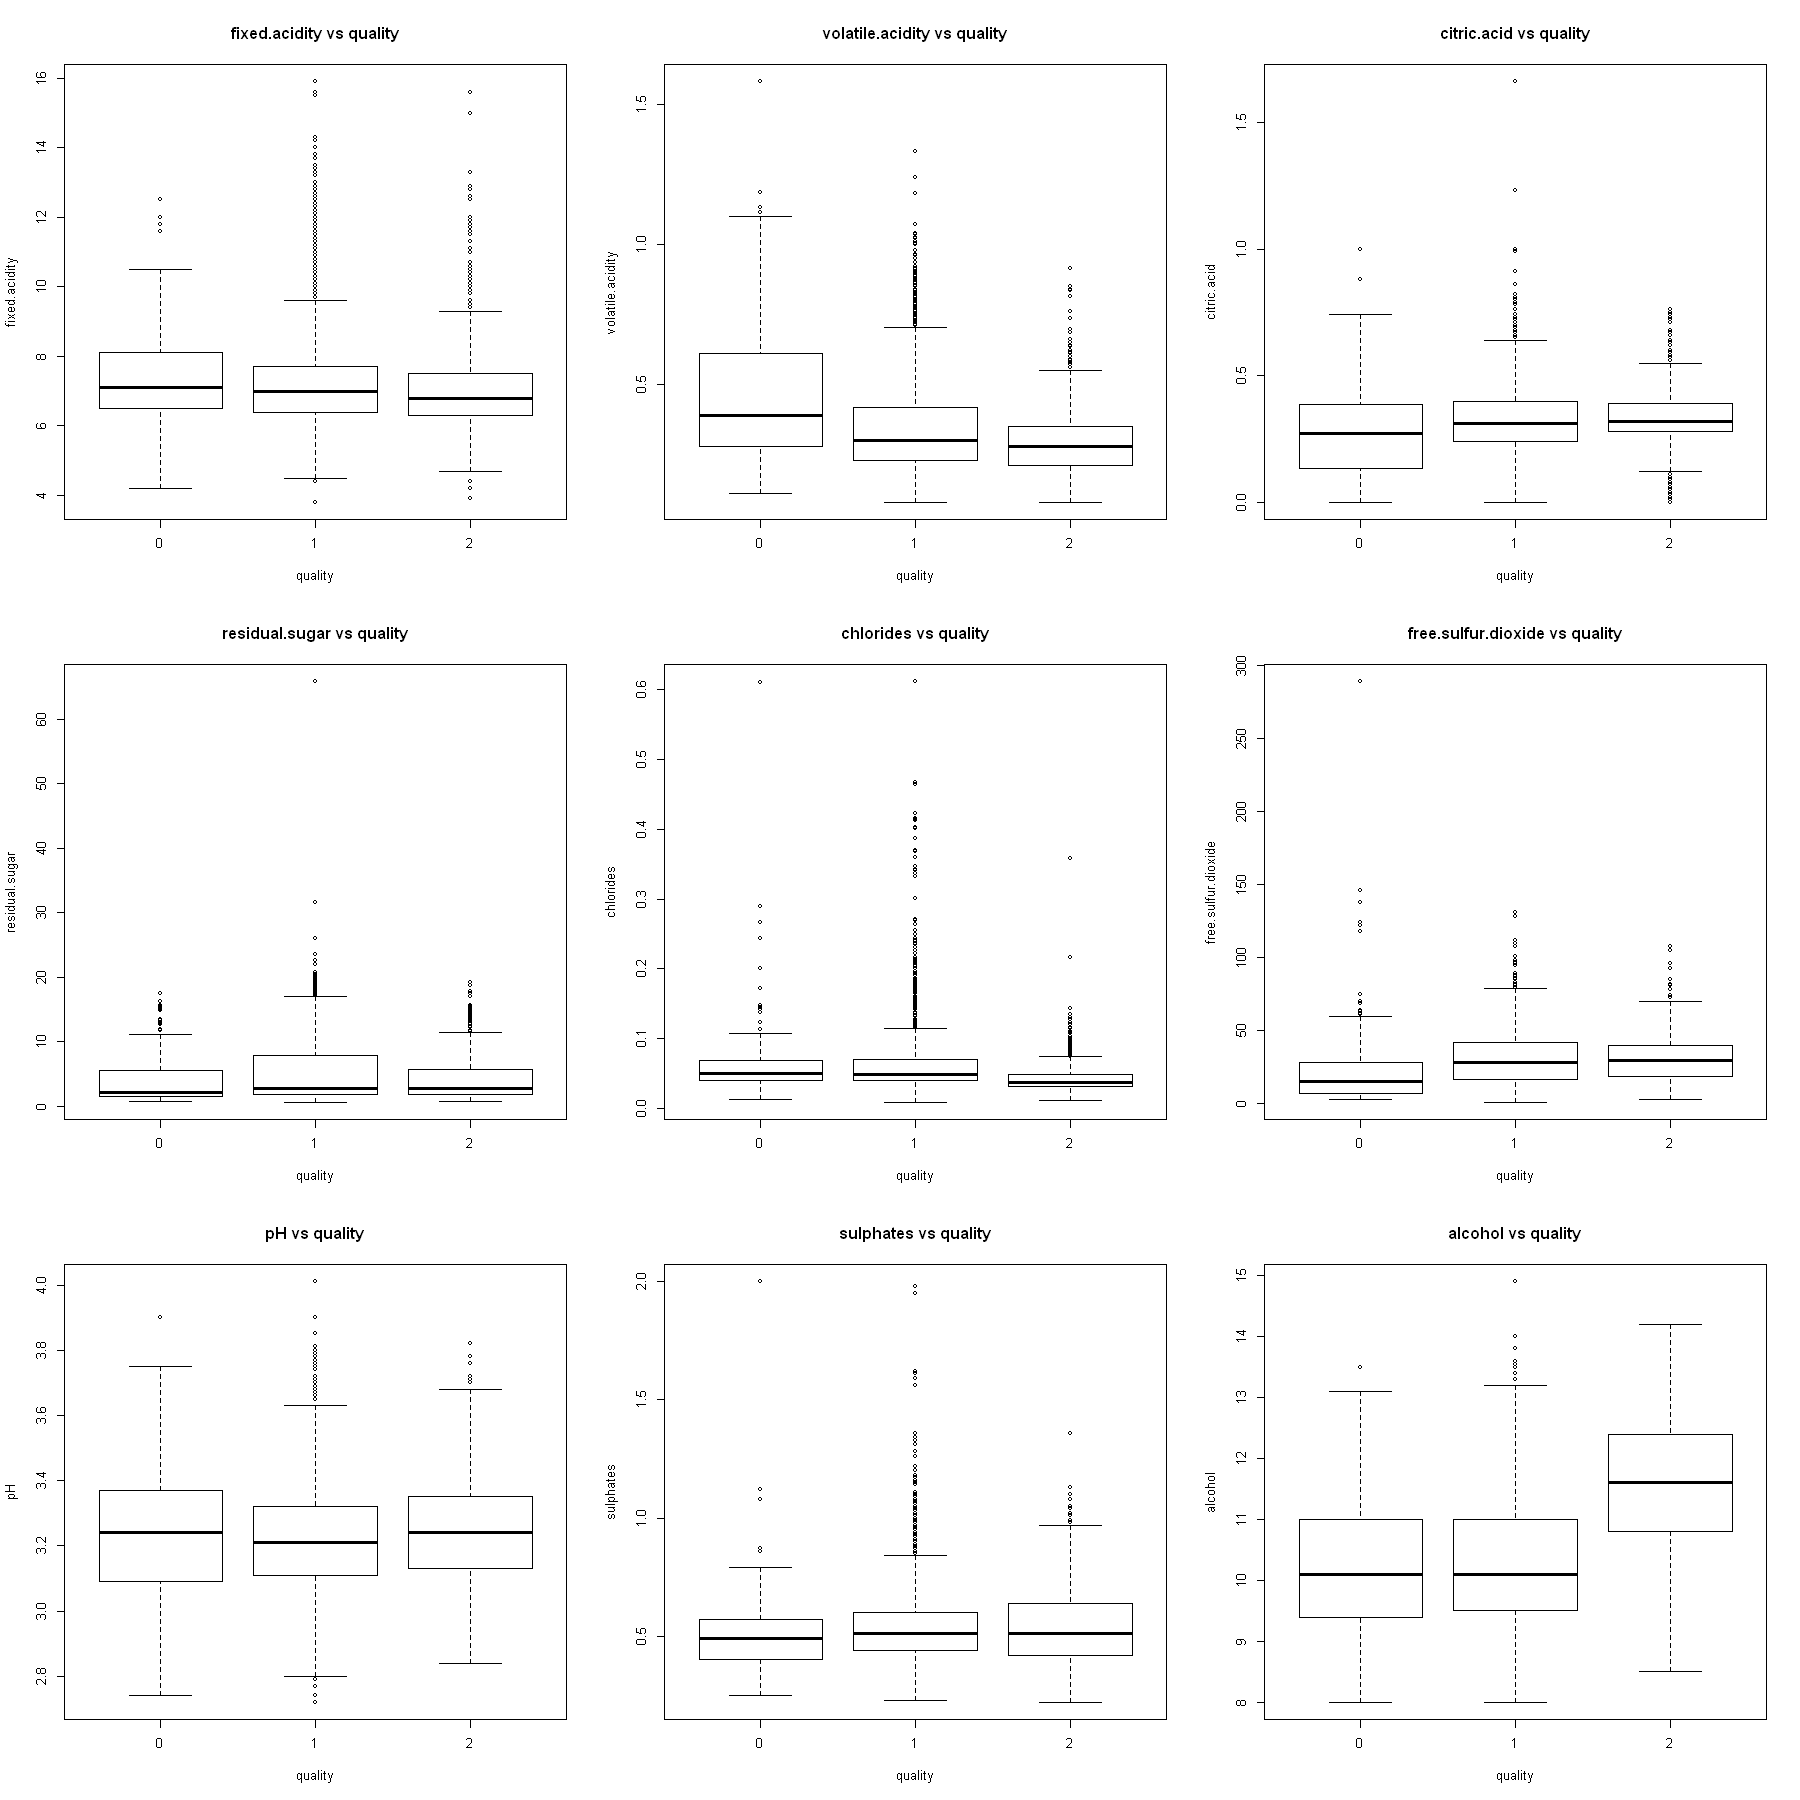

In [636]:
# set plot size to 15 x 12
options(repr.plot.width=15, repr.plot.height=15)
# check the bivariate plot between quality and the independent variables
par(mfrow=c(3,3)) # set the layout of the plots

# fixed.acidity vs quality
boxplot(fixed.acidity~quality,data=wine3, main="fixed.acidity vs quality", xlab="quality", ylab="fixed.acidity") 

# volatile.acidity vs quality
boxplot(volatile.acidity~quality,data=wine3, main="volatile.acidity vs quality", xlab="quality", ylab="volatile.acidity")

# citric.acid vs quality
boxplot(citric.acid~quality,data=wine3, main="citric.acid vs quality", xlab="quality", ylab="citric.acid")

# residual.sugar vs quality
boxplot(residual.sugar~quality,data=wine3, main="residual.sugar vs quality", xlab="quality", ylab="residual.sugar")

# chlorides vs quality
boxplot(chlorides~quality,data=wine3, main="chlorides vs quality", xlab="quality", ylab="chlorides")

# free.sulfur.dioxide vs quality
boxplot(free.sulfur.dioxide~quality,data=wine3, main="free.sulfur.dioxide vs quality", xlab="quality",
        ylab="free.sulfur.dioxide")

# pH vs quality
boxplot(pH~quality,data=wine3, main="pH vs quality", xlab="quality", ylab="pH")

# sulphates vs quality
boxplot(sulphates~quality,data=wine3, main="sulphates vs quality", xlab="quality", ylab="sulphates")

# alcohol vs quality
boxplot(alcohol~quality,data=wine3, main="alcohol vs quality", xlab="quality", ylab="alcohol")

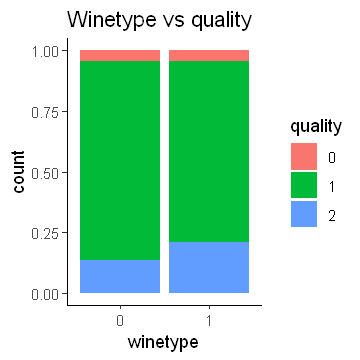

In [637]:
# set plot size to 3 x 3
options(repr.plot.width=3, repr.plot.height=3)
# Winetype vs quality
ggplot(data=wine3,aes(x=winetype,fill=quality))+  # set x, fill
  geom_bar(position="fill")+   # choose barplot and set the position
  ggtitle("Winetype vs quality")+ # add title
  theme_classic() # blank background

### Explanations:

* The aboved plots shows the target quality and other independent variables;
* From the plots, Low quality (0) wine has higher fixed.acidity, volatitle.acidity and chlorides, but lower citric acid,and
free.sulfur.dioxide, the Medium(1) and High quality(2) does not have big difference in these variables.
* For the achohol, quality 2 is higher, 0 and 1 are similar;
* For the residual.suger,  1 is higher, no big difference in 0 and 2;
* For pH, 1 is lower and the other two have no big difference;
* For sulphates, there is no big difference in the three levels of quality;
* More High quality 2 in white wine and more medium quality 1 and low quality 0 in red wine.

## 3. Data preparation

### 3.1 Data transformation

* Based on the previous exporation, the dataset has the following problems: values are not in the same range; many outliers and skewness.
* Next I will do Boxcox transformation, standardization and scaling

In [638]:
# Standardize the variables and do BoxCox transformation to reduce the skewness
range<-preProcess(wine3[,1:9],method=c("center","scale","BoxCox"))
wine4<-cbind(predict(range,wine3[,1:9]),"winetype"=wine3$winetype,"quality"=wine3$quality)

In [639]:
# check the summary
summary(wine4)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   :-5.917   Min.   :-3.759   Min.   :-2.164   Min.   :-2.108  
 1st Qu.:-0.593   1st Qu.:-0.653   1st Qu.:-0.533   1st Qu.:-0.800  
 Median : 0.011   Median :-0.014   Median :-0.058   Median :-0.318  
 Mean   : 0.000   Mean   : 0.000   Mean   : 0.000   Mean   : 0.000  
 3rd Qu.: 0.581   3rd Qu.: 0.674   3rd Qu.: 0.554   3rd Qu.: 0.898  
 Max.   : 3.217   Max.   : 3.005   Max.   : 9.116   Max.   : 3.482  
   chlorides      free.sulfur.dioxide       pH           sulphates     
 Min.   :-6.371   Min.   :-2.862      Min.   :-3.870   Min.   :-3.926  
 1st Qu.:-0.613   1st Qu.:-0.728      1st Qu.:-0.693   1st Qu.:-0.685  
 Median :-0.063   Median : 0.070      Median :-0.031   Median : 0.011  
 Mean   : 0.000   Mean   : 0.000      Mean   : 0.000   Mean   : 0.000  
 3rd Qu.: 0.703   3rd Qu.: 0.727      3rd Qu.: 0.698   3rd Qu.: 0.631  
 Max.   : 3.483   Max.   : 6.219      Max.   : 3.832   Max.   : 4.158  
    alcohol  

In [640]:
# check the skewness of numeric variables
sapply(wine4[,1:9],function(x) skewness(x))

fixed.acidity    volatile.acidity         citric.acid      residual.sugar 
          -0.082276           -0.010036            0.484036            0.326290 
          chlorides free.sulfur.dioxide                  pH           sulphates 
          -0.095946           -0.097758           -0.009243            0.020778 
            alcohol 
           0.059315

In [641]:
# Scaling the numeric valiables
scale<-preProcess(wine4[,1:9],method=c("range"))
wine4_2<-cbind(predict(scale,wine4[,1:9]),"winetype"=wine4$winetype,"quality"=wine4$quality)

In [642]:
# check the summary
summary(wine4_2)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar 
 Min.   :0.000   Min.   :0.000    Min.   :0.000   Min.   :0.000  
 1st Qu.:0.583   1st Qu.:0.459    1st Qu.:0.145   1st Qu.:0.234  
 Median :0.649   Median :0.553    Median :0.187   Median :0.320  
 Mean   :0.648   Mean   :0.556    Mean   :0.192   Mean   :0.377  
 3rd Qu.:0.711   3rd Qu.:0.655    3rd Qu.:0.241   3rd Qu.:0.538  
 Max.   :1.000   Max.   :1.000    Max.   :1.000   Max.   :1.000  
   chlorides     free.sulfur.dioxide       pH          sulphates    
 Min.   :0.000   Min.   :0.000       Min.   :0.000   Min.   :0.000  
 1st Qu.:0.584   1st Qu.:0.235       1st Qu.:0.412   1st Qu.:0.401  
 Median :0.640   Median :0.323       Median :0.498   Median :0.487  
 Mean   :0.646   Mean   :0.315       Mean   :0.502   Mean   :0.486  
 3rd Qu.:0.718   3rd Qu.:0.395       3rd Qu.:0.593   3rd Qu.:0.564  
 Max.   :1.000   Max.   :1.000       Max.   :1.000   Max.   :1.000  
    alcohol      winetype quality 
 Min.   :0.000   0:1

### Explanations:

* After standardization, the numeric variables are with mean of 0 and standard deviation of 1.
* After the BoxCox transformation, the skewness are reduced and now all absolute values of the skewness of the numeric variables are less than 1.
* Now after the scaling, the values of all numeric variables are in the same range, between 0 and 1.

###  Check the distribution of numeric variables before and after transformation

#### Histogram

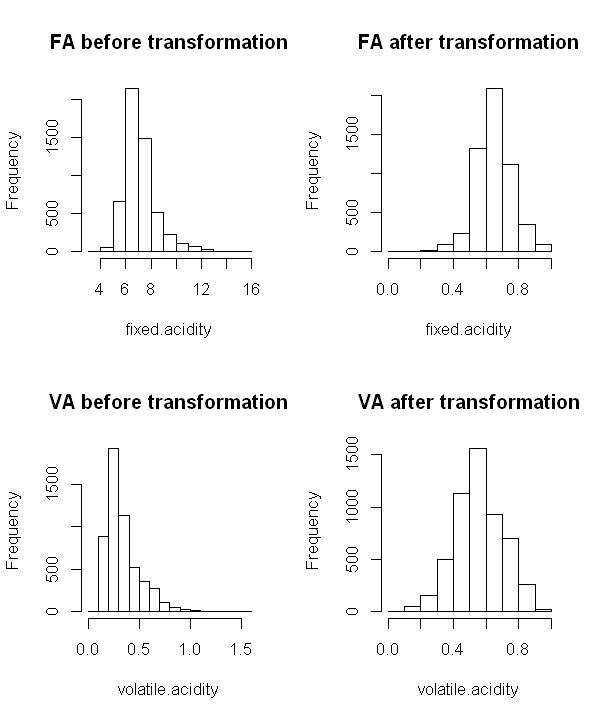

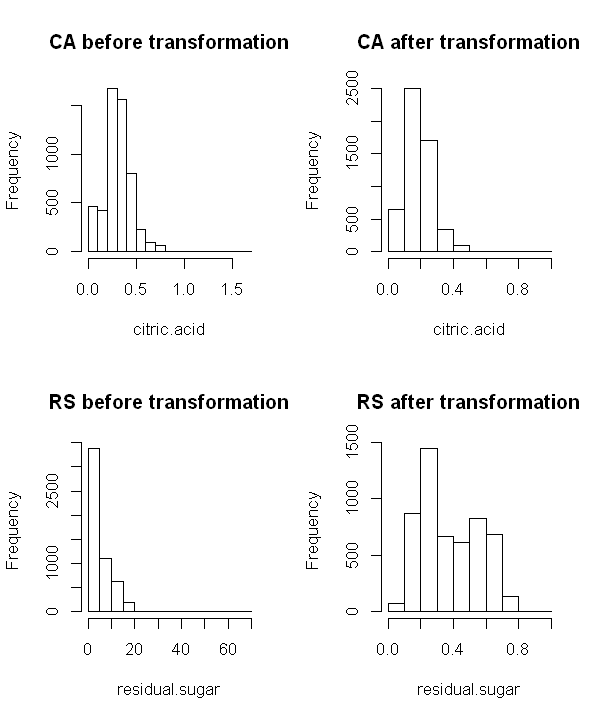

In [643]:
# set plot size to 5x 6
options(repr.plot.width=5, repr.plot.height=6)

par(mfrow=c(2,2)) # set the layout of the plots

# check the distribution
hist(wine3$fixed.acidity, xlab="fixed.acidity",main="FA before transformation")
hist(wine4_2$fixed.acidity, xlab="fixed.acidity",main="FA after transformation")

hist(wine3$volatile.acidity, xlab="volatile.acidity",main="VA before transformation")
hist(wine4_2$volatile.acidity, xlab="volatile.acidity",main="VA after transformation")

hist(wine3$citric.acid, xlab="citric.acid",main="CA before transformation")
hist(wine4_2$citric.acid, xlab="citric.acid",main="CA after transformation")

hist(wine3$residual.sugar, xlab="residual.sugar",main="RS before transformation")
hist(wine4_2$residual.sugar, xlab="residual.sugar",main="RS after transformation")


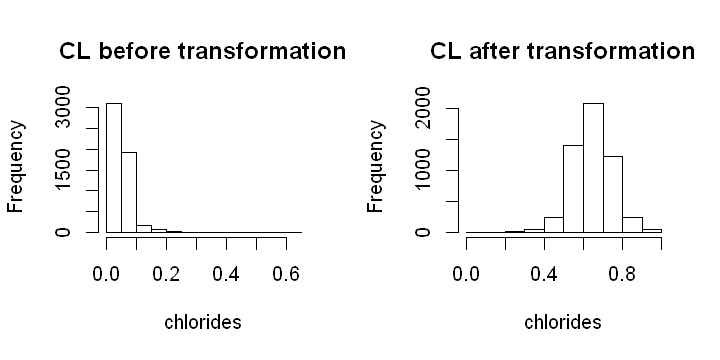

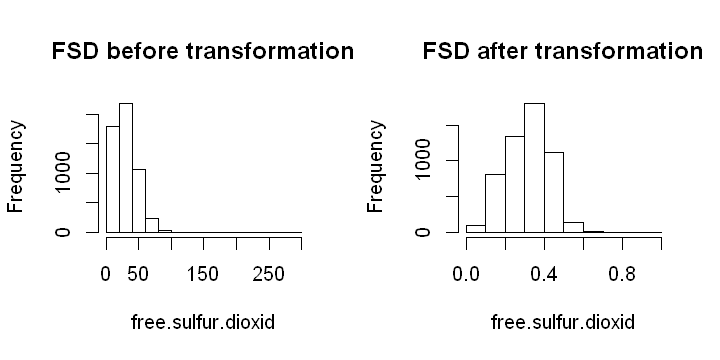

In [644]:
# set plot size to 6x 3
options(repr.plot.width=6, repr.plot.height=3)

par(mfrow=c(1,2)) # set the layout of the plots

# check the distribution
hist(wine3$chlorides, xlab="chlorides",main="CL before transformation")
hist(wine4_2$chlorides, xlab="chlorides",main="CL after transformation")

hist(wine3$free.sulfur.dioxid, xlab="free.sulfur.dioxid",main="FSD before transformation")
hist(wine4_2$free.sulfur.dioxid, xlab="free.sulfur.dioxid",main="FSD after transformation")

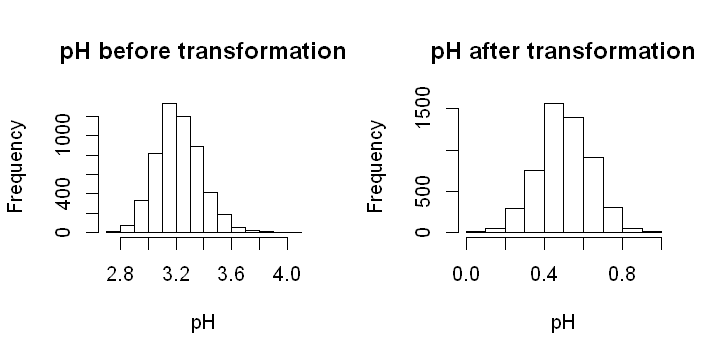

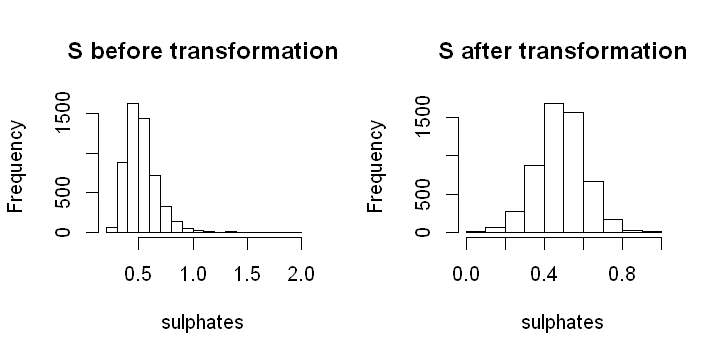

In [645]:
# set plot size to 6x3
options(repr.plot.width=6, repr.plot.height=3)

par(mfrow=c(1,2)) # set the layout of the plots

# check the distribution
hist(wine3$pH, xlab="pH",main="pH before transformation")
hist(wine4_2$pH, xlab="pH",main="pH after transformation")

hist(wine3$sulphates, xlab="sulphates",main="S before transformation")
hist(wine4_2$sulphates, xlab="sulphates",main="S after transformation")

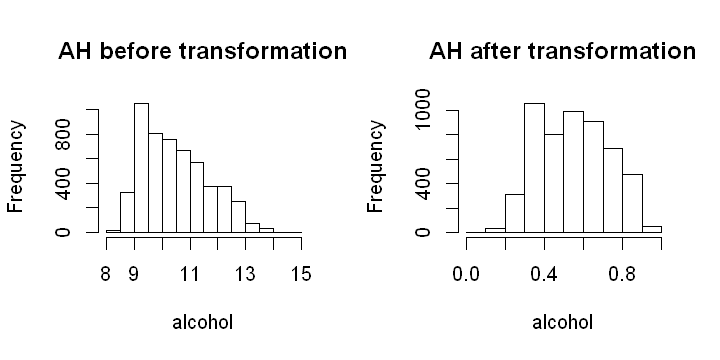

In [646]:
# set plot size to 6x3
options(repr.plot.width=6, repr.plot.height=3)

# check the distribution
par(mfrow=c(1,2)) # set the layout of the plots
hist(wine3$alcohol, xlab="alcohol",main="AH before transformation")
hist(wine4_2$alcohol, xlab="alcohol",main="AH after transformation")

### Explanations:

* From the histogram plots, after the transforamtion of BoxCox to remove the skewness, the standidization and scaling to between 0 to 1, the numeric variables are normally distributed and the value is between 0 and 1.

### Check the distribution of numeric variables before and after transformation

#### Boxplot

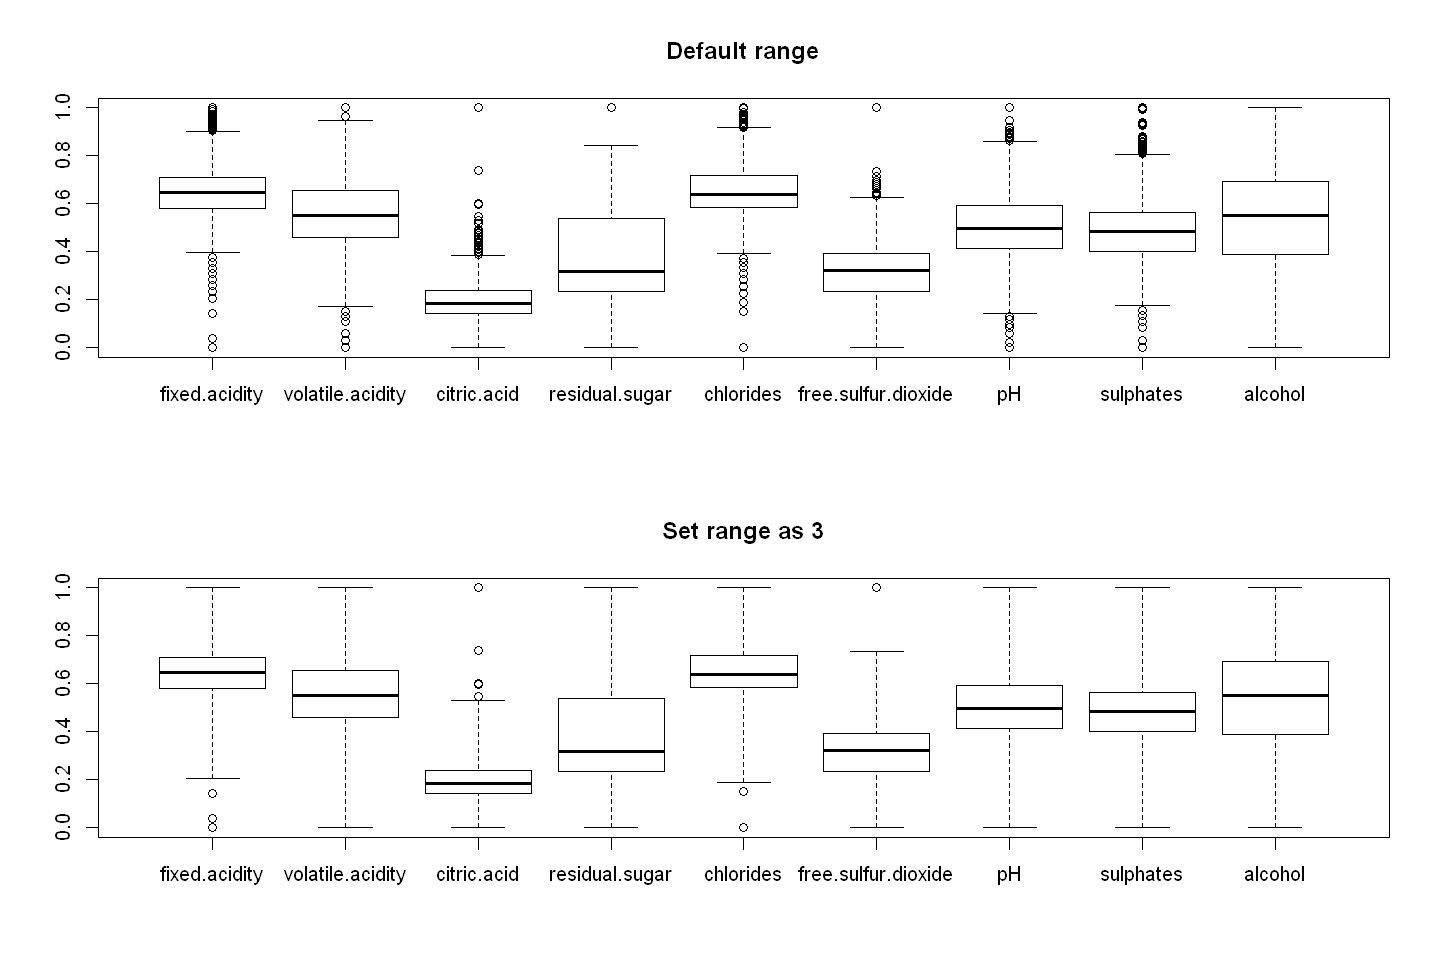

In [647]:
# check the distribution after scaling
# set plot size to 12 x 8
options(repr.plot.width=12, repr.plot.height=8)
par(mfrow=c(2,1))

boxplot(wine4_2[,1:9],main="Default range") 

# set the range of the outlier as 3 since there are too many outliers, we should not remove all of them
# here I set the threshhold of the outliers as 3 and will remove the outliers out of this range
boxplot(wine4_2[,1:9],range=3, main="Set range as 3") 

### Explanations:

* After scaling, now all the variables are between 0 and 1.

* Based on the first plot with default range(1.5IQR), they are many outliers, it is impossible to remove all of them since we will lose a lot of information, so I selected the threshold of the outliers as 3IQR and will remove them based on the range. 


### 3.2  Handle the outliers

In [648]:
# extract the index of the outliers based on range=3
# from the above plot, only 4 variables have outliers
fa_out1<-which(wine4_2$fixed.acidity %in% boxplot(wine4_2$fixed.acidity,range=3,plot=F)$out)

ca_out1<-which(wine4_2$citric.acid %in% boxplot(wine4_2$citric.acid,range=3,plot=F)$out)

cl_out1<-which(wine4_2$chlorides %in% boxplot(wine4_2$chlorides,range=3,plot=F)$out)

fsd_out1<-which(wine4_2$free.sulfur.dioxide %in% boxplot(wine4_2$free.sulfur.dioxide,range=3,plot=F)$out)

# combine all the index of outlier to be removed and extract the unique values
out_index1<-unique(c(fa_out1,ca_out1,sp_out1,cl_out1,fsd_out1))

# check the number of outliers
length(out_index1)

[1] 18

In [649]:
# exclude the outliers
wine5<-wine4_2[-out_index1,]

# check the structure
str(wine5)
table(wine5$quality)

'data.frame':	5302 obs. of  11 variables:
 $ fixed.acidity      : num  0.686 0.719 0.719 0.894 0.686 ...
 $ volatile.acidity   : num  0.809 0.867 0.83 0.53 0.793 ...
 $ citric.acid        : num  0 0 0.0241 0.3373 0 ...
 $ residual.sugar     : num  0.245 0.312 0.286 0.245 0.234 ...
 $ chlorides          : num  0.746 0.793 0.782 0.744 0.744 ...
 $ free.sulfur.dioxide: num  0.186 0.303 0.226 0.244 0.207 ...
 $ pH                 : num  0.72 0.49 0.539 0.456 0.72 ...
 $ sulphates          : num  0.532 0.619 0.6 0.548 0.532 ...
 $ alcohol            : num  0.367 0.447 0.447 0.447 0.367 ...
 $ winetype           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ quality            : Factor w/ 3 levels "0","1","2": 2 2 2 2 2 2 3 3 2 2 ...



   0    1    2 
 233 4064 1005 

### Explanations:

* Only 18 outliers were removed and after removing the outliers, dataset has 5302 rows and 11 columns.

* There are 233 of 0, 4064 of 1 and 1005 of 2, which is imbalanced, but it is the real characteristic of the data,
I will keep it like this. If I resample, the total sample number will become much less since the class 0 has only 233 samples, and it will influence the result significantly.

### 3.3 Split the data

In [650]:
# split the data into train and test set
set.seed(112233) # set random seed
train_index<-createDataPartition(wine5$quality,p=0.7,list=F) # split
wine_train<-wine5[train_index,] # extract training set
wine_test<-wine5[-train_index,] # extract testing set

In [ ]:
table(wine_train$quality) # balance of target for training set
table(wine_test$quality) # balance of target for test set

### Explanations:

* After splitting, the training set and testing set include all the levels of the target, although they are imbalenced, it is the real characteristic of the statistics in real life, I will keep them for future modelling. 

## 4. Model fitting and evaluation
### 4.1 Model 1---Model C50


Call:
C5.0.default(x = wine_train[, -11], y = wine_train[, 11])


C5.0 [Release 2.07 GPL Edition]  	Sun Mar 01 19:38:57 2020
-------------------------------

Class specified by attribute `outcome'

Read 3713 cases (11 attributes) from undefined.data

Decision tree:

alcohol <= 0.582638:
:...volatile.acidity <= 0.4426254: 1 (438/76)
:   volatile.acidity > 0.4426254:
:   :...volatile.acidity <= 0.7600499: 1 (1412/136)
:       volatile.acidity > 0.7600499:
:       :...winetype = 0:
:           :...residual.sugar > 0.2088006: 1 (228/13)
:           :   residual.sugar <= 0.2088006:
:           :   :...alcohol > 0.489661: 0 (4)
:           :       alcohol <= 0.489661:
:           :       :...sulphates <= 0.7026565: 1 (19/3)
:           :           sulphates > 0.7026565: 0 (2)
:           winetype = 1:
:           :...sulphates > 0.5481117: 0 (5)
:               sulphates <= 0.5481117:
:               :...alcohol > 0.5184585: 0 (3)
:                   alcohol <= 0.5184585:
:                 

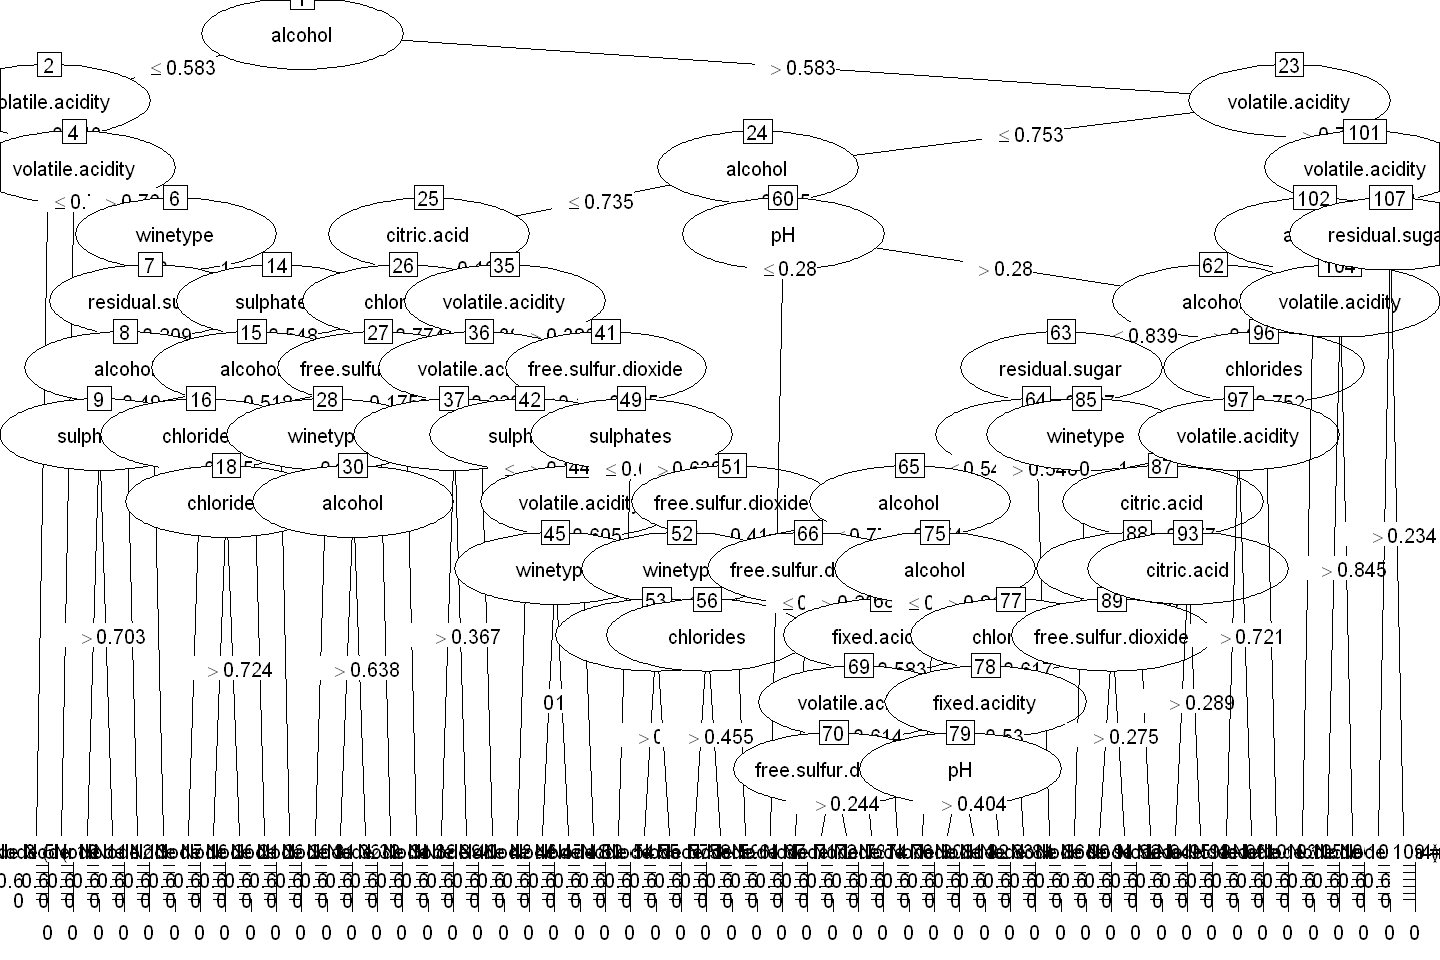

In [651]:
set.seed(112233) # set random seed
C1_mod<-C5.0(wine_train[,-11], wine_train[,11]) # fit model using training set
summary(C1_mod)  # check the summary of the data
plot(C1_mod)   # plot the result

In [652]:
# check the accuracy of the training set
print("train_accuracy_C1: ")
(train_accuracy_C1<-mean(predict(C1_mod,wine_train[,-11])==wine_train$quality)) # print the accuracy

[1] "train_accuracy_C1: "


[1] 0.8303

In [653]:
# make prediction using testing set and check the result
pred1<-predict(C1_mod,wine_test) # make prediction for the testing set
print("test_accuracy_C1: ")
(test_accuracy_C1 <- mean(predict(C1_mod,wine_test) == wine_test$quality)) # print the accuracy
confusionMatrix(pred1,wine_test$quality) # check the result

[1] "test_accuracy_C1: "


[1] 0.7703

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2
         0    3    7    0
         1   65 1120  200
         2    1   92  101

Overall Statistics
                                        
               Accuracy : 0.77          
                 95% CI : (0.749, 0.791)
    No Information Rate : 0.767         
    P-Value [Acc > NIR] : 0.397         
                                        
                  Kappa : 0.254         
                                        
 Mcnemar's Test P-Value : <2e-16        

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity           0.04348    0.919   0.3355
Specificity           0.99539    0.284   0.9278
Pos Pred Value        0.30000    0.809   0.5206
Neg Pred Value        0.95820    0.515   0.8566
Prevalence            0.04342    0.767   0.1894
Detection Rate        0.00189    0.705   0.0636
Detection Prevalence  0.00629    0.872   0.1221
Balanced Accuracy     0.51944    0.601   0.6317

### Explanations:

* The acuracy of the traing set is 0.8303 and the testing set is 0.7703.

* From the confusionMatrix, many class 2 are misclassified as class 1, I think the inbalance caused this since majority of the class is 1

* The sensitivity for class 1 is highest, while the specificity for class 0 is highest, maybe beacause the class 1 has the most number and the class 0 has the least number.

### 4.2 Model 2-Neural network model

In [654]:
set.seed(112233) # set random seed
nnet_mod<-nnet(quality~.,data=wine_train,size=10,maxit=1000,decay=0.01) # fit the model

# weights:  143
initial  value 4926.416744 
iter  10 value 2257.383325
iter  20 value 1960.242590
iter  30 value 1895.838161
iter  40 value 1852.068287
iter  50 value 1829.783625
iter  60 value 1818.904145
iter  70 value 1813.951948
iter  80 value 1803.994555
iter  90 value 1783.321992
iter 100 value 1771.911034
iter 110 value 1761.664653
iter 120 value 1752.446941
iter 130 value 1743.152421
iter 140 value 1735.772908
iter 150 value 1731.018146
iter 160 value 1727.145615
iter 170 value 1722.050239
iter 180 value 1719.317039
iter 190 value 1717.508933
iter 200 value 1715.168311
iter 210 value 1713.509587
iter 220 value 1711.224341
iter 230 value 1709.364616
iter 240 value 1708.702666
iter 250 value 1708.124979
iter 260 value 1707.597684
iter 270 value 1707.260149
iter 280 value 1707.043327
iter 290 value 1706.850201
iter 300 value 1706.767256
iter 310 value 1706.561615
iter 320 value 1706.039098
iter 330 value 1705.562938
iter 340 value 1705.372133
iter 350 value 1705.315207
iter 360 va

In [655]:
# check the accuracy of the training set
print("train_accuracy_nt: ")  # print the accuracy
(train_accuracy_nt<-mean(as.factor(predict(nnet_mod,wine_train[,-11],type="class"))==wine_train$quality)) 

[1] "train_accuracy_nt: "


[1] 0.8088

In [656]:
# make prediction based on the testing set and check the accuracy
pred2<-as.factor(predict(nnet_mod,wine_test,type="class")) # prediction
print("test_accuracy_nt: ")
(test_accuracy_nt<-mean(pred2==wine_test$quality))  # print the accuracy
confusionMatrix(pred2,wine_test$quality) # check the result

[1] "test_accuracy_nt: "


[1] 0.7823

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2
         0    6   11    0
         1   62 1136  200
         2    1   72  101

Overall Statistics
                                        
               Accuracy : 0.782         
                 95% CI : (0.761, 0.802)
    No Information Rate : 0.767         
    P-Value [Acc > NIR] : 0.0807        
                                        
                  Kappa : 0.283         
                                        
 Mcnemar's Test P-Value : <2e-16        

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity           0.08696    0.932   0.3355
Specificity           0.99276    0.292   0.9433
Pos Pred Value        0.35294    0.813   0.5805
Neg Pred Value        0.95992    0.565   0.8587
Prevalence            0.04342    0.767   0.1894
Detection Rate        0.00378    0.715   0.0636
Detection Prevalence  0.01070    0.880   0.1095
Balanced Accuracy     0.53986    0.612   0.6394

### Explanations:

* The neral network model got converged after 380 iterations at the learning rate of 0.01 with 10 nodes.

* The neural network model got the accuracy for training dataset is 0.8088, whereas that of the testing dateset is 0.782.

* The kappa is only 0.283, indicating the classification is not very good, maybe because the target levels are imbalanced, 
too many values in class 1 and too less values in class 0, but this is the sitiuation of real life, in which most of the 
wine quality is medium while few are in poor quality, therefore, to solve this problem, more data should be collected. 
That way, more number will be included in poor quality class 0.

### 4.3 Model 3---Naive Bayesian Model

In [657]:
set.seed(112233)
# fit model
nb_mod<-naiveBayes(wine_train[,-11],wine_train[,11])

In [658]:
# check the accuracy of the training set
print("train_accuracy_nb: ")
(train_accuracy_nb<-mean(predict(nb_mod,wine_train[,-11])==wine_train$quality)) # print the accuracy

[1] "train_accuracy_nb: "


[1] 0.7479

In [659]:
# make prediction based on the testing set and check the accuracy
pred3<-predict(nb_mod,wine_test[,-11])  # prediction
print("test_accuracy_nb: ")
(test_accuracy_nb<-mean(pred3==wine_test$quality)) # print the accuracy
confusionMatrix(pred3,wine_test$quality) # check the result

[1] "test_accuracy_nb: "


[1] 0.7571

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2
         0    4   22    0
         1   58 1041  143
         2    7  156  158

Overall Statistics
                                        
               Accuracy : 0.757         
                 95% CI : (0.735, 0.778)
    No Information Rate : 0.767         
    P-Value [Acc > NIR] : 0.836         
                                        
                  Kappa : 0.328         
                                        
 Mcnemar's Test P-Value : 2.8e-05       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity           0.05797    0.854   0.5249
Specificity           0.98553    0.457   0.8734
Pos Pred Value        0.15385    0.838   0.4922
Neg Pred Value        0.95841    0.487   0.8872
Prevalence            0.04342    0.767   0.1894
Detection Rate        0.00252    0.655   0.0994
Detection Prevalence  0.01636    0.782   0.2020
Balanced Accuracy     0.52175    0.655   0.6992

### Explanations:

* The naiveBayesian model got a training accuracy of 0.7479, surprisingly, the testing accuracy is even higher than 
training set, 0.7571.

* The naiveBayesian model is based on the theory that the variables are independent with each other, although in the data exploratory process, I have removed two variables which have correlation higher than 0.6 with other variables, the remaining variables are still not totally independent,such as the citric.acid and pH, they are somehow correlated since pH is the measurement of acidity. This can be explored further in the future study.

### 4.4 Summary of single models

In [660]:
# set the digits as 4
options(digits=4)
# create a 3 * 2 matrix
Accuracy <- matrix(nrow=3, ncol=2, byrow=TRUE)
# rename the row names and column names for the matrix
dimnames(Accuracy) <- list(c("C5.0", "nnet", "naiveBayes" ),c("Train_acccurary", "Test_accuracy") )
# add accuracy of train data and test data for each model
Accuracy["C5.0",] <- c(train_accuracy_C1,test_accuracy_C1)
Accuracy["nnet",] <- c(train_accuracy_nt,test_accuracy_nt)
Accuracy["naiveBayes",] <- c(train_accuracy_nb,test_accuracy_nb)
# display the Accuracy
Accuracy

,Train_acccurary,Test_accuracy
C5.0,0.8303,0.7703
nnet,0.8088,0.7823
naiveBayes,0.7479,0.7571


### Explanations:

* From the result of the three single models, for training set, the C5.0 model got the highest accuaracy of 0.8303.

* For testing set, the nnet got the best accuracy of 0.7823.

* For model C5.0 and nnet, the training accuracy is higher than testing accuracy, however, for naiveBayes model, the testing accuracy is higher than training set.

* Overall, the nnet has the best accuracy since it uses very complicated functions with 10 nodes to fit the  model, it learns well and got good result.

* The naiveBayes model has the worst result since it is thoeretically based on the indepenndent variables, although I have removed two variables which have correlations, there are still some variables correlated with each other, such as those acid variables and pH since pH is the metric of acidity. They are not linearly correlated but log correlated, which I will explore in the near future due to the time limit at this stage.

### Task 2:  (30 points): By exploring the dataset, run an ensemble classifier (e.g. random forest) method to check the improvement on the accuracy of the wine quality prediction. What would be the improved accuracy for the proposed method


### 4.5  Ensemble model--Random Forest model

In [661]:
# set tuning parameters
rf_ranges<-list(ntree=c(50,100,150,200),mtry=3:10)
# tune the model
rf_tune<-tune(randomForest, quality~., data=wine_train,ranges=rf_ranges)
# get the best parameters
rf_tune$best.parameters

,ntree,mtry
4,200,3


In [662]:
# get the best model
rf_mod <- rf_tune$best.model
# summarize the model
rf_mod


Call:
 best.tune(method = randomForest, train.x = quality ~ ., data = wine_train,      ranges = rf_ranges) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 3

        OOB estimate of  error rate: 19.61%
Confusion matrix:
  0    1   2 class.error
0 9  153   2     0.94512
1 7 2704 134     0.04956
2 0  432 272     0.61364

In [663]:
importance(rf_mod)

,MeanDecreaseGini
fixed.acidity,124.491
volatile.acidity,151.391
citric.acid,121.876
residual.sugar,143.070
chlorides,154.368
free.sulfur.dioxide,141.320
pH,140.195
sulphates,143.343
alcohol,263.496
winetype,7.217


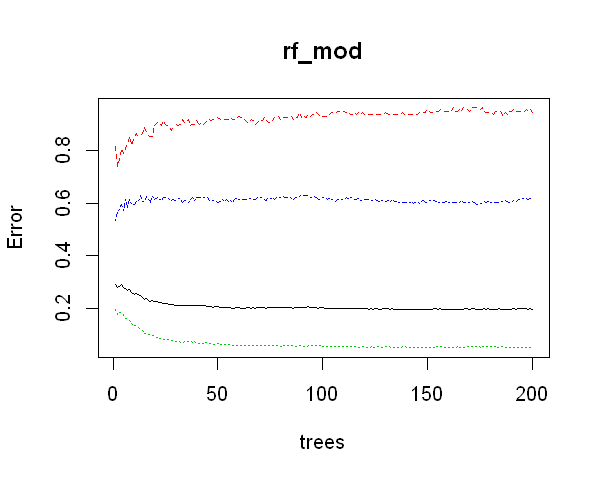

In [664]:
# plot the error rate
# set plot size to 5 x 4
options(repr.plot.width=5, repr.plot.height=4)
plot(rf_mod)

In [665]:
# check the accuracy of the training set
print("train_accuracy_rf:")
# print the accuracy
(train_accuracy_rf<-(mean(predict(rf_mod,wine_train)==wine_train$quality)))

[1] "train_accuracy_rf:"


[1] 1

In [666]:
# predict the labels based on test data
pred4 <- predict(rf_mod,wine_test)
print("test_accuracy_rf: ")
# print the accuracy
(test_accuracy_rf<-(mean(pred4==wine_test$quality)))
confusionMatrix(pred4,wine_test$quality) # check the result

[1] "test_accuracy_rf: "


[1] 0.7986

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2
         0    3    1    0
         1   65 1168  203
         2    1   50   98

Overall Statistics
                                        
               Accuracy : 0.799         
                 95% CI : (0.778, 0.818)
    No Information Rate : 0.767         
    P-Value [Acc > NIR] : 0.00143       
                                        
                  Kappa : 0.303         
                                        
 Mcnemar's Test P-Value : < 2e-16       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity           0.04348    0.958   0.3256
Specificity           0.99934    0.276   0.9604
Pos Pred Value        0.75000    0.813   0.6577
Neg Pred Value        0.95836    0.667   0.8590
Prevalence            0.04342    0.767   0.1894
Detection Rate        0.00189    0.735   0.0617
Detection Prevalence  0.00252    0.904   0.0938
Balanced Accuracy     0.52141    0.617   0.6430

### Explanations:
* The random forest model got the best parameter of 200 trees and 3 variables for splitting at each tree node.

* It has a very high error rate in class 0, maybe because the number of class 0 is too limited, which is the problem of this dataset, if more data collected and more class 0 included in the model fitting, better result will be got.The class 2 error is also high, whereas class 1 has the lowest error rate because class 1 has themost number and class 1 does not have enough sample.

* Gini decrease mean decrease in the Gini index of node impurity, or increase of node purity by splits on the variable.The importance of the variables aligns with the previous bivariate plots during exploratory data analysis, where the achohol has the biggest difference between class 2 and other two calsses, then comes the chlorides and volatile acidity,ect.

* The training set accuracy is 1, while the testing set is 0.7986, obviouly the model has overfitting, it learns very well in the training dataset but predict the testing set is not satisfied. But it has improved the accuracy and is still higher than the other three models.

***Reference: https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3***

## 5. Summary 

In [667]:
# set the digits as 4
options(digits=4)
# create a 4 * 2 matrix
Accuracy1 <- matrix(nrow=4, ncol=2, byrow=TRUE)
# rename the row names and column names for the matrix
dimnames(Accuracy1) <- list(c("C5.0", "nnet", "naiveBayes","RandomForest"),
c("Train_acccurary", "Test_accuracy") )
# add accuracy of train data and test data for each model
Accuracy1["C5.0",] <- c(train_accuracy_C1,test_accuracy_C1)
Accuracy1["nnet",] <- c(train_accuracy_nt,test_accuracy_nt)
Accuracy1["naiveBayes",] <- c(train_accuracy_nb,test_accuracy_nb)
Accuracy1["RandomForest",] <- c(train_accuracy_rf,test_accuracy_rf)

# display the Accuracy
Accuracy1

,Train_acccurary,Test_accuracy
C5.0,0.8303,0.7703
nnet,0.8088,0.7823
naiveBayes,0.7479,0.7571
RandomForest,1.0000,0.7986



### Explanations:

* According to the result of the three single models and one ensemble model, from the accuracy, the random forest has the best result since it has higher training accuracy of 1 as well as testing accuracy of 0.7986.

* Random forest consists of a large number of individual decision trees that operate as an ensemble. It allows each individual tree to randomly sample from the dataset with replacement, resulting in different trees.This process is bagging. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

* The reason that the random forest model works so well is: a large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

* However, in this dataset, the error rate is very high in class 0, and lower error rate in class 1 bacause this dataset is imbalanced, there is big difference among the number of the three classes. 

* I tried to used a relatively balanced data to relevel the quality, like classifying the quality level into three groups as follows, Low(3,4,5), Medium(6),High(7,8,9), then all the levels will have more than 1000 samples, but during the data visulization, I didnot find much difference based on the bivariate plots, I guess the calssification will not be good. I also tried to fit the model based on this relevelling, the result is bad, and the accuracy is less than 0.70. So I selected this classification, which is more recognized based on the consumer review (we often consider level<5 as poor, 5 and 6 as medium, level>7 as high quality), Low(2,3,4),Medium(5,6),High(7,8), but I found the dataset is imbalanced. Since this calssification is more reasonable in real life, I just keep the data like this. 

* I also considered to relevel it into 2 levels, which will be easier and less imbalanced, but that is not reasonable in real life, which we often recognize three levels for quality review. One solution in the real life is to collect more data to include more number of low quality review data into the data.

***Reference: https://towardsdatascience.com/understanding-random-forest-58381e0602d2***
